### **Packages**

In [1]:
#Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')

### **Data**

In [2]:
#Load data (2024 Stack Overflow Developer Survey)
df = pd.read_csv('survey_results_public.csv')

In [3]:
#Filter the data so it only contains the survey results for those who are professional developers
developer_df = df[df['MainBranch'] == 'I am a developer by profession']

In [4]:
#Examine the number of rows and columns in the data
developer_df.shape

(50207, 114)

In [5]:
#Examine the structure and content of the data
developer_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


### **Questions**

#### **1. Do Professional Developers Consider AI To Be A Threat?**

In [6]:
#Check for any missing values in the 'AIThreat' column
developer_df['AIThreat'].isnull().sum()

np.int64(15298)

In [7]:
#Impute any missing values with the mode in the 'AIThreat' column
developer_df['AIThreat'] = developer_df['AIThreat'].fillna(developer_df['AIThreat'].mode()[0])

In [8]:
#Examine the value counts in the the 'AIThreat' column
AIThreat_counts = developer_df['AIThreat'].value_counts()
print(AIThreat_counts)

AIThreat
No              39495
I'm not sure     6675
Yes              4037
Name: count, dtype: int64


In [9]:
#Relabel 'I'm not sure' to 'Undecided' in the 'AIThreat' column
developer_df['AIThreat'] = developer_df['AIThreat'].replace("I'm not sure", "Undecided")

In [10]:
#Examine the value counts in the modified 'AIThreat' column
AIThreat_counts = developer_df['AIThreat'].value_counts()
print(AIThreat_counts)

AIThreat
No           39495
Undecided     6675
Yes           4037
Name: count, dtype: int64


In [11]:
#Modify the value counts to be percentages in the modified 'AIThreat' column
AIThreat_percentages = AIThreat_counts / len(developer_df) * 100

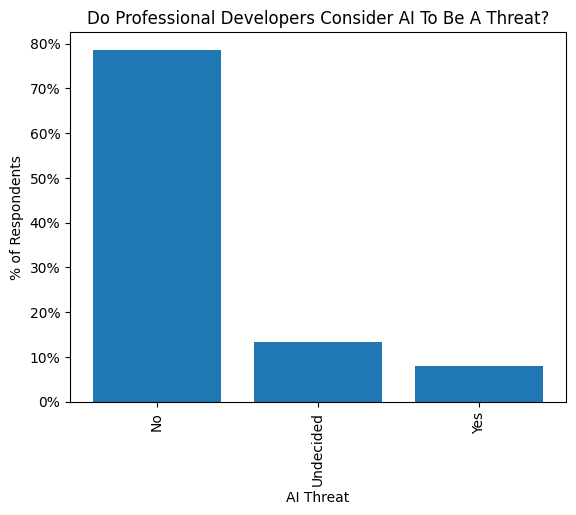

In [12]:
#Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(AIThreat_percentages.index, AIThreat_percentages.values)

#Create the title and x- and y-axis labels 
plt.title('Do Professional Developers Consider AI To Be A Threat?')
plt.xlabel('AI Threat')
plt.xticks(rotation='vertical')
plt.ylabel('% of Respondents')
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #Format counts as percentages

#Show the plot
plt.show()

##### **The majority of professional developers do not consider AI to be a threat.**

In [ ]:
##################################################################################

In [13]:
#Filter the data so it only contains the survey results for those professional developers who consider Al to be a threat
AI_Threat_developer_df = developer_df[developer_df['AIThreat'] == 'Yes']

#### **2. What Is The Work Model Of Those Professional Developers Who Consider AI To Be A Threat?**

In [14]:
#Check for any missing values in the 'RemoteWork' column
AI_Threat_developer_df['RemoteWork'].isnull().sum()

np.int64(382)

In [15]:
#Impute any missing values with the mode in the 'RemoteWork' column
AI_Threat_developer_df['RemoteWork'] = AI_Threat_developer_df['RemoteWork'].fillna(AI_Threat_developer_df['RemoteWork'].mode()[0])

In [16]:
#Examine the value counts in the 'RemoteWork' column
RemoteWork_counts = AI_Threat_developer_df['RemoteWork'].value_counts()
print(RemoteWork_counts)

RemoteWork
Remote                                  1907
Hybrid (some remote, some in-person)    1465
In-person                                665
Name: count, dtype: int64


In [17]:
#Relabel 'Hybrid (some remote, some in-person)' to 'Hybrid' in the 'RemoteWork' column
AI_Threat_developer_df['RemoteWork'] = AI_Threat_developer_df['RemoteWork'].replace("Hybrid (some remote, some in-person)", "Hybrid")

In [18]:
#Examine the value counts in the modified 'RemoteWork' column
RemoteWork_counts = AI_Threat_developer_df['RemoteWork'].value_counts()
print(RemoteWork_counts)

RemoteWork
Remote       1907
Hybrid       1465
In-person     665
Name: count, dtype: int64


In [19]:
#Modify the value counts to be percentages in the 'RemoteWork' column
RemoteWork_percentages = RemoteWork_counts / len(AI_Threat_developer_df) * 100

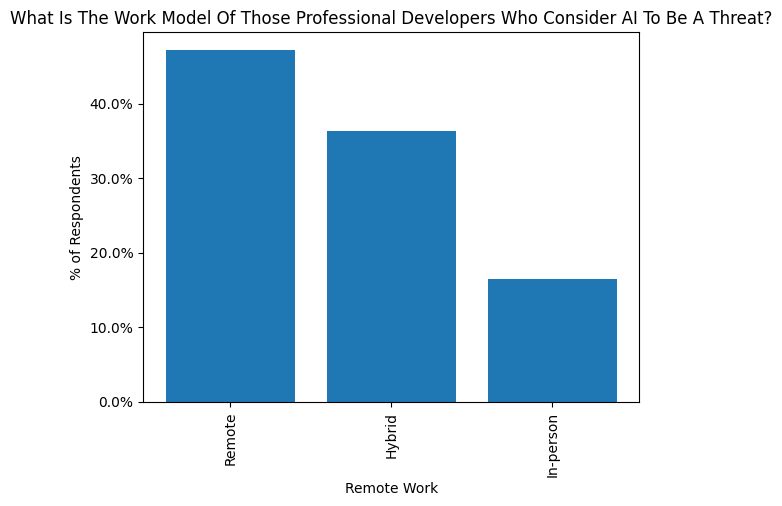

In [20]:
# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(RemoteWork_percentages.index, RemoteWork_percentages.values)

#Create the title and x- and y-axis labels 
plt.title('What Is The Work Model Of Those Professional Developers Who Consider AI To Be A Threat?')
plt.xlabel('Remote Work')
plt.xticks(rotation='vertical')
plt.ylabel('% of Respondents')
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #Format counts as percentages

#Show the plot
plt.show()

##### **Those professional developers who consider AI to be a threat primarily work remotely.**

#### **3. How Many Years of Experience Do Those Professional Developers Who Consider AI To Be A Threat Have?**

In [21]:
#Check for any missing values in the 'WorkExp' column
AI_Threat_developer_df['WorkExp'].isnull().sum()

np.int64(1845)

In [22]:
#Impute any missing values with the mode in the 'WorkExp' column
AI_Threat_developer_df['WorkExp'] = AI_Threat_developer_df['WorkExp'].fillna(AI_Threat_developer_df['WorkExp'].mode()[0])

In [23]:
#Examine the value counts in the 'WorkExp' column
WorkExp_counts = AI_Threat_developer_df['WorkExp'].value_counts()
print(WorkExp_counts)

WorkExp
3.0     2023
10.0     159
5.0      151
2.0      150
7.0      147
4.0      143
8.0      139
6.0      122
1.0      114
15.0      96
12.0      94
20.0      76
9.0       59
13.0      55
25.0      54
14.0      47
18.0      44
11.0      42
16.0      40
17.0      37
24.0      34
30.0      29
22.0      19
26.0      16
19.0      16
0.0       16
23.0      13
21.0      12
27.0      11
31.0      10
28.0       9
29.0       8
50.0       8
33.0       7
40.0       7
35.0       6
38.0       6
34.0       4
45.0       3
36.0       3
32.0       2
44.0       2
37.0       1
46.0       1
39.0       1
42.0       1
Name: count, dtype: int64


In [24]:
#Recode numerical values into categorical ones in the 'WorkExp' column
AI_Threat_developer_df['WorkExp'] = np.where((AI_Threat_developer_df['WorkExp'] >= 10) & (AI_Threat_developer_df['WorkExp'] < 20), '10-19 Years', 
                             np.where((AI_Threat_developer_df['WorkExp'] >= 20) & (AI_Threat_developer_df['WorkExp'] < 30), '20-29 Years',
                             np.where((AI_Threat_developer_df['WorkExp'] >= 30) & (AI_Threat_developer_df['WorkExp'] < 40), '30-39 Years',
                             np.where((AI_Threat_developer_df['WorkExp'] >= 40) & (AI_Threat_developer_df['WorkExp'] < 49), '40-49 Years',
                            '1-9 Years'))))

In [25]:
#Examine the value counts in the modified 'WorkExp' column
WorkExp_counts = AI_Threat_developer_df['WorkExp'].value_counts()
print(WorkExp_counts)

WorkExp
1-9 Years      3072
10-19 Years     630
20-29 Years     252
30-39 Years      69
40-49 Years      14
Name: count, dtype: int64


In [26]:
#Modify the value counts to be percentages in the modified 'WorkExp' column
WorkExp_percentages = WorkExp_counts / len(AI_Threat_developer_df) * 100

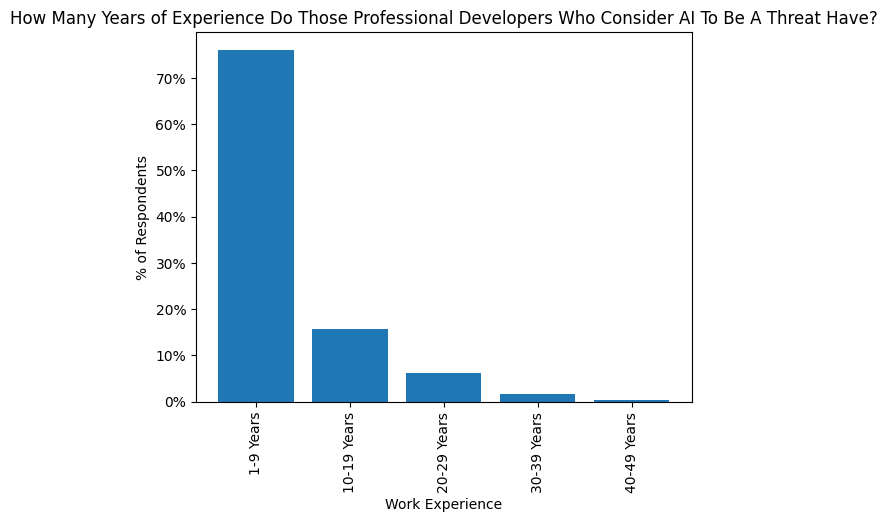

In [27]:
# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(WorkExp_percentages.index, WorkExp_percentages.values)

#Create the title and x- and y-axis labels
plt.title('How Many Years of Experience Do Those Professional Developers Who Consider AI To Be A Threat Have?')
plt.xlabel('Work Experience')
plt.xticks(rotation='vertical')
plt.ylabel('% of Respondents')
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #Format counts as percentages

# Show the plot
plt.show()

##### **Those professional developers who consider AI to be a threat primarily have less than 10 years of experience.**

#### **4. What Is The Level of Education Of Those Professional Developers Who Consider AI To Be A Threat?**

In [28]:
#Check for any missing values in the 'EdLevel' column
AI_Threat_developer_df['EdLevel'].isnull().sum()

np.int64(107)

In [29]:
#Impute any missing values with the mode in the 'WorkExp' column
AI_Threat_developer_df['EdLevel'] = AI_Threat_developer_df['EdLevel'].fillna(AI_Threat_developer_df['EdLevel'].mode()[0])

In [30]:
#Examine the value counts in the 'EdLevel' column
EdLevel_counts = AI_Threat_developer_df['EdLevel'].value_counts()
print(EdLevel_counts)

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          1965
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       1084
Some college/university study without earning a degree                                 453
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     208
Associate degree (A.A., A.S., etc.)                                                    126
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         117
Something else                                                                          49
Primary/elementary school                                                               35
Name: count, dtype: int64


In [31]:
#Recode values in the 'EdLevel' column
AI_Threat_developer_df['EdLevel'] = np.where((AI_Threat_developer_df['EdLevel'] == "Bachelor’s degree (B.A., B.S., B.Eng., etc.)"),"Bachelor's Degree", 
                             np.where((AI_Threat_developer_df['EdLevel'] == "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"),"Master's Degree",
                             np.where((AI_Threat_developer_df['EdLevel'] == "Some college/university study without earning a degree"),'Some College / University',
                             np.where((AI_Threat_developer_df['EdLevel'] == "Associate degree (A.A., A.S., etc.)"), "Associate's Degree",
                             np.where((AI_Threat_developer_df['EdLevel'] == "Professional degree (JD, MD, Ph.D, Ed.D, etc.)"), "Professional Degree (JD, MD, Ph.D, etc.)",
                             np.where((AI_Threat_developer_df['EdLevel'] == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)"), "High School",     
                            'Other'))))))

In [32]:
#Examine the value counts in the modified 'EdLevel' column
EdLevel_counts = AI_Threat_developer_df['EdLevel'].value_counts()
print(EdLevel_counts)

EdLevel
Bachelor's Degree                           1965
Master's Degree                             1084
Some College / University                    453
High School                                  208
Associate's Degree                           126
Professional Degree (JD, MD, Ph.D, etc.)     117
Other                                         84
Name: count, dtype: int64


In [33]:
#Modify the value counts to be percentages in the 'EdLevel' column
EdLevel_percentages = EdLevel_counts / len(AI_Threat_developer_df) * 100

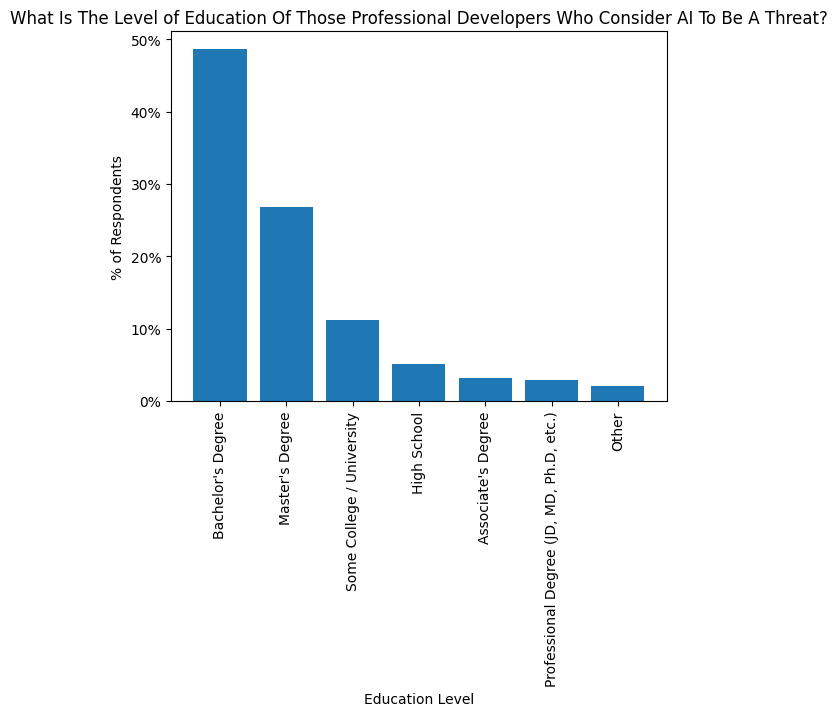

In [34]:
#Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(EdLevel_percentages.index, EdLevel_percentages.values)

#Create the title and x- and y-axis labels
plt.title('What Is The Level of Education Of Those Professional Developers Who Consider AI To Be A Threat?')
plt.xlabel('Education Level')
plt.xticks(rotation='vertical')
plt.ylabel('% of Respondents')
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #Format counts as percentages

#Show the plot
plt.show()

##### **Those professional developers who consider AI to be a threat primarily have a bachelor's degree.**

#### **5. What Country Are Those Professional Developers Who Consider AI To Be A Threat From? (Top 10)**

In [35]:
#Check for any missing values in the 'Country' column
AI_Threat_developer_df['Country'].isnull().sum()

np.int64(149)

In [36]:
#Impute any missing values with the mode in the 'Country' column
AI_Threat_developer_df['Country'] = AI_Threat_developer_df['Country'].fillna(AI_Threat_developer_df['Country'].mode()[0])

In [37]:
#Examine the value counts for the top 10 countries 
top_10_Country_counts = AI_Threat_developer_df['Country'].value_counts().nlargest(10)
print(top_10_Country_counts)

Country
United States of America                                816
India                                                   447
Germany                                                 226
Ukraine                                                 216
United Kingdom of Great Britain and Northern Ireland    179
Canada                                                  142
France                                                  140
Poland                                                  106
Brazil                                                   94
Italy                                                    93
Name: count, dtype: int64


In [38]:
#Modify the value counts for the top 10 countries to be percentages
top_10_Country_percentages = top_10_Country_counts / len(AI_Threat_developer_df) * 100

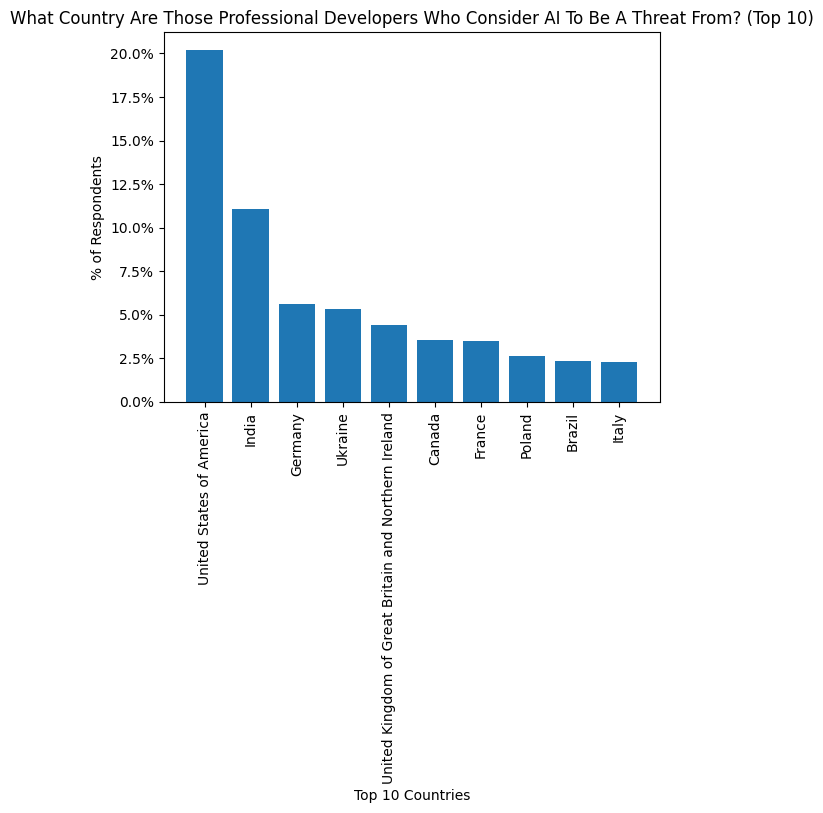

In [39]:
#Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(top_10_Country_percentages.index, top_10_Country_percentages.values)

#Create the title and x- and y-axis labels
plt.title('What Country Are Those Professional Developers Who Consider AI To Be A Threat From? (Top 10)')
plt.xlabel('Top 10 Countries')
plt.xticks(rotation='vertical')
plt.ylabel('% of Respondents')
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #Format counts as percentages

# Show the plot
plt.show()

##### **Those professional developers who consider AI to be a threat primarily come from the United, followed by India, and then Germany.**